In [1]:
# Importing required libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# Initializing the CNN
model = Sequential()

# Step 1 - Convolution Layer
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening Layer
model.add(Flatten())

# Full connection (Neural Network)
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax')) # output layer with 4 neurons for 4 classes


In [3]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:\Mahesh\IMARTICUS\Cotton project\cotton/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:\Mahesh\IMARTICUS\Cotton project\cotton/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1310 images belonging to 4 classes.
Found 328 images belonging to 4 classes.


In [5]:
training_set.class_indices

{'bacterial_blight': 0, 'curl_virus': 1, 'fussarium_wilt': 2, 'healthy': 3}

In [6]:
# Train the CNN
model.fit(training_set,
          epochs = 15,
          validation_data = test_set)

Epoch 1/15
41/41 [==============================] - 25s 573ms/step - loss: 1.1202 - accuracy: 0.4794 - val_loss: 1.0829 - val_accuracy: 0.5366
Epoch 2/15
41/41 [==============================] - 22s 528ms/step - loss: 0.7833 - accuracy: 0.6901 - val_loss: 0.8875 - val_accuracy: 0.6524
Epoch 3/15
41/41 [==============================] - 22s 529ms/step - loss: 0.7082 - accuracy: 0.7252 - val_loss: 0.6784 - val_accuracy: 0.7622
Epoch 4/15
41/41 [==============================] - 21s 526ms/step - loss: 0.6403 - accuracy: 0.7489 - val_loss: 0.6613 - val_accuracy: 0.7591
Epoch 5/15
41/41 [==============================] - 21s 519ms/step - loss: 0.5312 - accuracy: 0.8084 - val_loss: 0.5009 - val_accuracy: 0.8293
Epoch 6/15
41/41 [==============================] - 21s 521ms/step - loss: 0.4929 - accuracy: 0.8153 - val_loss: 0.4301 - val_accuracy: 0.8476
Epoch 7/15
41/41 [==============================] - 22s 527ms/step - loss: 0.3959 - accuracy: 0.8573 - val_loss: 0.5877 - val_accuracy: 0.8140

In [7]:
model.save('cotton_leaf.h5')

pip install opencv-python-headless==4.5.2.52 --user

In [8]:
import cv2

In [9]:
from tensorflow import keras


In [10]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 

#import cv2
%matplotlib inline

In [11]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    img_arr = image.img_to_array(raw_img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    # Load the pre-trained model
    model = keras.models.load_model('cotton_leaf.h5')

    # Predict class probabilities
    class_probs = model.predict(img_arr)

    # Get the predicted class label
    predicted_class_idx = np.argmax(class_probs, axis=-1)
    class_labels = ['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy'] # replace with actual class labels
    predicted_class_label = class_labels[predicted_class_idx[0]]

    # Display the image and predicted class
    plt.imshow(cv2.imread(path))
    plt.title(predicted_class_label)
    plt.show()

In [12]:
import os 
os.chdir(r"D:\Mahesh\IMARTICUS\Cotton project\Live_data\live_for_test")

1/1 [==============================] - 0s 215ms/step


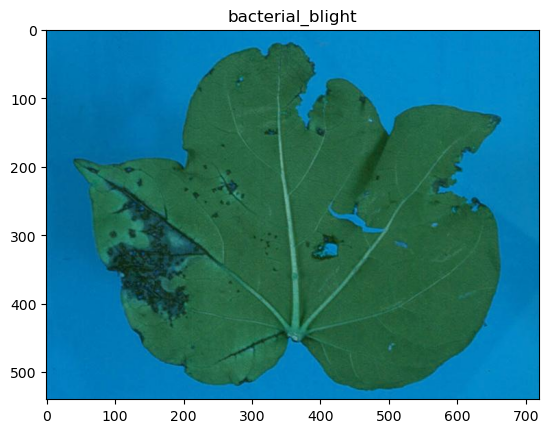

In [13]:
model_output("bact14.jpg")

1/1 [==============================] - 0s 136ms/step


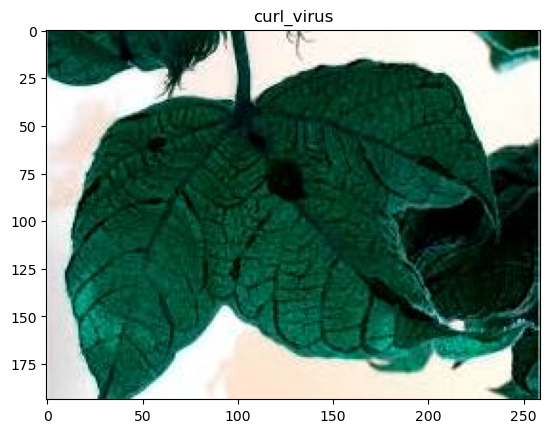

In [14]:
model_output("curl117.jpg")

1/1 [==============================] - 0s 141ms/step


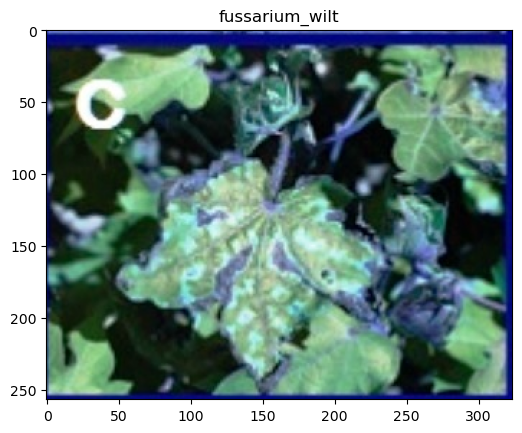

In [15]:
model_output("fus202.jpg")

1/1 [==============================] - 0s 141ms/step


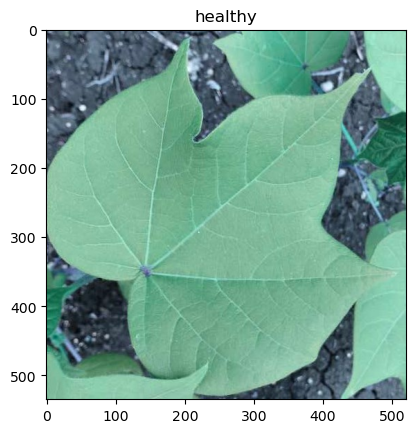

In [16]:
model_output("h133.jpg")

1/1 [==============================] - 0s 141ms/step


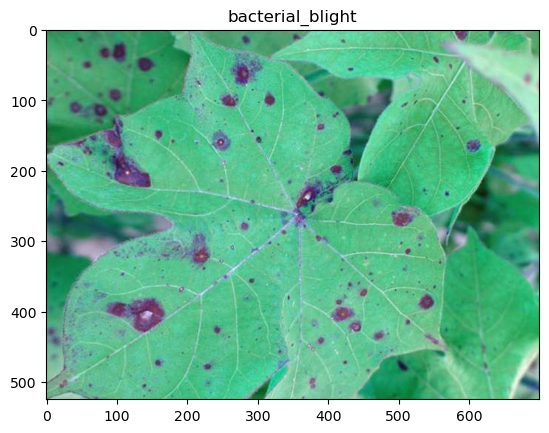

In [17]:
model_output("cotton-leaf1.jpg")

1/1 [==============================] - 0s 156ms/step


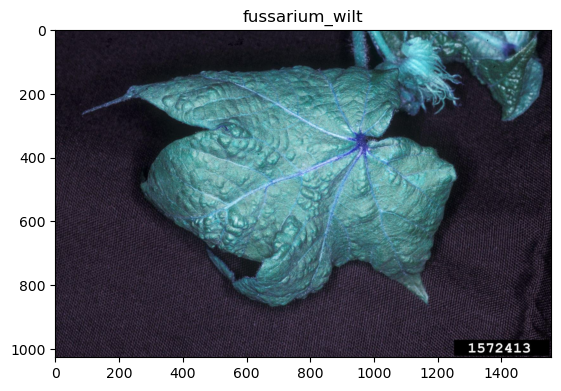

In [18]:
model_output("cotton-leaf2.jpg")

1/1 [==============================] - 0s 163ms/step


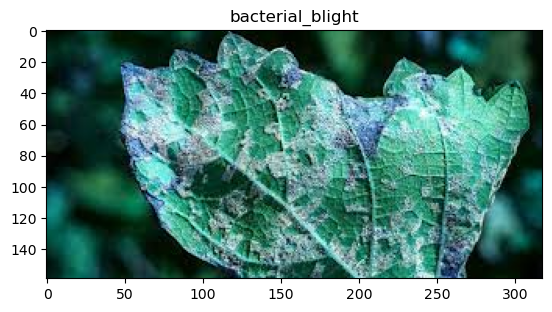

In [19]:
model_output("cotton-leaf3.jpg")

1/1 [==============================] - 0s 133ms/step


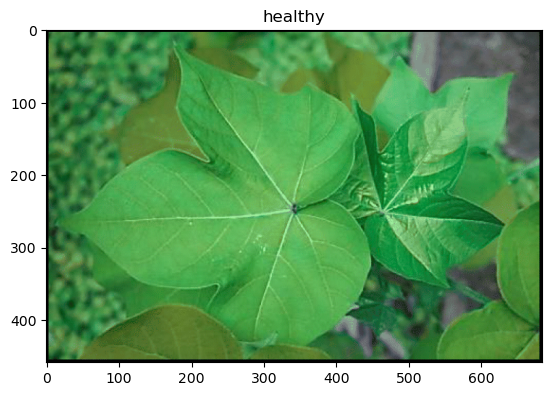

In [20]:
model_output("cotton-leaf4.jpg")